In [94]:
inp = """5 1 5 8 12 13
9 8 1 23 1 11 13 12 15 13 1"""

In [282]:
import sys
import re
import random

In [96]:
inp = inp.split('\n')

In [97]:
inp[0]

'5 1 5 8 12 13'

In [98]:
inp_list = []
for line in inp:
    inp_list.append(list(map(int, line.split())))

In [99]:
n_src, *src = inp_list[0]
n_tgt, *tgt = inp_list[1]

In [100]:
from math import ceil

In [101]:
def binary_search(arr, tgt):
    l_border = 0
    r_border = len(arr) - 1
    
    while r_border - l_border >= 0:
        center_idx = (r_border + l_border)//2
        if arr[center_idx] == tgt:
            return center_idx        
        if arr[center_idx] < tgt:
            l_border = center_idx + 1
        else:
            r_border = center_idx - 1
       
    return -1

In [102]:
src, tgt

([1, 5, 8, 12, 13], [8, 1, 23, 1, 11, 13, 12, 15, 13, 1])

In [103]:
for el in tgt:
    print(binary_search(src, el))

2
0
-1
0
-1
4
3
-1
4
0


In [27]:
from math import ceilx

In [56]:
2//2

1

### Insversion check 
(merge-sort-like algorithm)

In [4]:
from collections import deque

In [274]:
inp = '6 6'

In [275]:
n_numbers = 6
arr = list(map(int, inp.split()))

In [276]:
squeezed_queue = deque([deque([el]) for el in arr])
squeezed_queue

deque([deque([6]), deque([6])])

In [277]:
def merge(arr1, arr2):
    inversion_cntr = 0
    sorted_arr = deque()

    while len(arr1) * len(arr2) > 0:
        if arr1[0] < arr2[0]:
            sorted_arr.append(arr1.popleft())            
        elif arr1[0] > arr2[0]:
            sorted_arr.append(arr2.popleft())
            inversion_cntr += len(arr1)
        else:
            while len(arr1) > 0 and arr1[0] == arr2[0]:
                sorted_arr.append(arr1.popleft())
            sorted_arr.append(arr2.popleft())
            inversion_cntr += len(arr1)
    
    while len(arr1) > 0:
        sorted_arr.append(arr1.popleft())
    while len(arr2) > 0:
        sorted_arr.append(arr2.popleft())
    
    return sorted_arr, inversion_cntr

In [383]:
def merge_inversions(arr):
    squeezed_queue = deque([deque([el]) for el in arr])
    n_inversions = 0
    curren_lvl_length = len(squeezed_queue)//2
    while len(squeezed_queue) > 1:
        initial_len = len(squeezed_queue)
        for i in range(curren_lvl_length):
            fst_el = squeezed_queue.popleft()
            snd_el = squeezed_queue.popleft()        
            merged_el, n_iter_inversions = merge(fst_el, snd_el)    
            n_inversions += n_iter_inversions
            squeezed_queue.append(merged_el)
        if initial_len%2 != 0 and len(squeezed_queue) > 1:
            fst_el = squeezed_queue.popleft()
            snd_el = squeezed_queue.pop()        
            merged_el, n_iter_inversions = merge(snd_el, fst_el)    
            n_inversions += n_iter_inversions
            squeezed_queue.append(merged_el)
        curren_lvl_length = len(squeezed_queue)//2
    return squeezed_queue, n_inversions

In [387]:
merge_inversions([7, 2, 3, 9, 9, 9, 6, 9, 6])[1]

11

In [388]:
get_inversed_pairs_number([7, 2, 3, 9, 9, 9, 6, 9, 6])

11

In [384]:
merge_inversions([4, 1, 3, 10, 5, 10, 8, 6, 4, 4])[1]

18

In [365]:
15

15

In [297]:
squeezed_queue

deque([deque([6, 6])])

In [298]:
n_inversions

0

In [299]:
def get_inversed_pairs_number(A):
    result = 0
    if len(A) < 2:
        return result

    for i, element in enumerate(A):
        for j, element2 in enumerate(A[i + 1:]):
            if element > element2:
                result += 1

    return result

In [386]:
def get_list_of_random_int():
    
    result = []
    for i in range(1000):
        result.append(random.randint(1, 10))
    return result

for k in range(998):
    random_test = get_list_of_random_int()
    naive_answer = get_inversed_pairs_number(random_test)
    answer2test = merge_inversions(random_test)[1]
    try:
        assert answer2test == naive_answer
    except AssertionError:
        print(f'Failed test #{k}')
        print(len(random_test))
        print(random_test)
        print('Expected:')
        print(naive_answer)
        print('Got:')
        print(answer2test)
        break

KeyboardInterrupt: 

In [322]:
str(random_test)

'[56, 37, 24, 58, 44, 44, 2, 67, 28]'

In [4]:
n_numbers = 7
arr = [7, 6, 5, 4, 3, 2, 1]

In [281]:
' '.join(list(map(str, [42, 42, 70, 79, 29, 85, 47, 81, 96, 3, 25, 52, 49, 84, 95, 17, 49, 7, 9, 76, 77, 79, 32, 45, 52, 30, 92, 85, 17, 32, 92, 2, 14, 85, 85, 21, 30, 86, 89, 79, 39, 49, 47, 17])))

'42 42 70 79 29 85 47 81 96 3 25 52 49 84 95 17 49 7 9 76 77 79 32 45 52 30 92 85 17 32 92 2 14 85 85 21 30 86 89 79 39 49 47 17'

In [5]:
inversion_cntr = 0
for i in range(n_numbers):
    for j in range(i, n_numbers):
        if arr[i] > arr[j]:
            inversion_cntr += 1

In [6]:
inversion_cntr

21

Quick-sort

In [382]:
import sys
import random
import time
from collections import deque

In [422]:
import bisect

In [268]:
import matplotlib.pyplot as plt

In [323]:
import statistics

In [77]:
inp = """2 3
0 5
7 10
1 6 11"""

In [78]:
inp_list = []
for line in inp.split('\n'):
    inp_list.append(list(map(int, line.split())))

In [79]:
inp_list

[[2, 3], [0, 5], [7, 10], [1, 6, 11]]

In [53]:
def naive_answer(vectors, points):
    res = []
    for point in points:
        n_entries = 0
        for vector in vectors:
            if point >= vector[0] and point <= vector[1]:
                n_entries += 1
        res.append(n_entries)
    return res

In [80]:
vectors = inp_list[1:-1]
points = inp_list[-1]

In [55]:
naive_answer(vectors, points)

[1, 0, 0]

In [14]:
class Vector4Sort(object):
    def __init__(self, x0, x1):
        self.x0 = x0
        self.x1 = x1

In [17]:
point = points[0]

In [248]:
def generate_test_samples(l_border=0, r_border=100, n_vectors=50000, n_points=50000):
    vectors = []
    points = []
    for _ in range(n_vectors):
        x0 = random.randint(l_border, r_border)
        x1 = random.randint(x0, r_border)
        vectors.append([x0, x1])
    
    for _ in range(n_points):
        point = random.randint(l_border, r_border)
        points.append(point)
    
    return vectors, points

In [130]:
test_samples = generate_test_samples(r_border=10)

In [131]:
test_samples

([[8, 10], [0, 0], [9, 10], [0, 1], [7, 9]], [10, 8, 2])

In [132]:
naive_answer(test_samples[0], test_samples[1])

[2, 2, 0]

In [133]:
quick_vector_sort(test_samples[0], test_samples[1])

[2, 2, 0]

In [260]:
def test_precision(naive_alg, target_alg, sample_pseudo_gen, pseudo_generator_kwargs):
    test_samples = sample_pseudo_gen(**pseudo_generator_kwargs)
    # print(test_samples)
    naive_answer = naive_alg(test_samples[0], test_samples[1])
    target_answer = target_alg(test_samples[0], test_samples[1])
    all_good = True
    for i in range(len(test_samples[1])):
        if naive_answer[i] != target_answer[i]:
            all_good = False
    return all_good, test_samples, naive_answer, target_answer

In [397]:
def split_vectors_x0(vectors, l_border, r_border, point):
    j = 0
    for i in range(l_border, r_border):
        if vectors[i][0] > point:
            # vectors.insert(0, vectors.pop(i))
            tmp = vectors[0]
            vectors[0] = vectors[i]
            vectors[i] = tmp
            j += 1
    return j
    
def split_vectors_x1(vectors, l_border, r_border, point):
    j = l_border
    
    for i in range(l_border, r_border):
        if vectors[i][1] < point:
            # vectors.insert(0, vectors.pop(i))
            tmp = vectors[l_border]
            vectors[l_border] = vectors[i]
            vectors[i] = tmp
            j += 1

    return j
    
def quick_vector_sort(vectors, points):
    res_dict = {}
    rand_idx = random.randint(0, len(points)-1)
    tmp = points[0]
    points[0] = points[rand_idx]
    points[rand_idx] = tmp    
    for point in points:
        if point not in res_dict:
            m = split_vectors_x1(vectors, 0, len(vectors), point)
            k = split_vectors_x0(vectors, m, len(vectors), point)
            res_dict[point] = len(vectors) - (k + m)
    points[rand_idx] = points[0]
    points[0] = tmp    
    return [res_dict[point] for point in points]

In [359]:
def split_vectors_x0(vectors, l_border, r_border, point):
    j = 0
    for i in range(l_border, r_border):
        if vectors[i][0] > point:
            vectors.insert(0, vectors.pop(i))
            j += 1
    return j
    
def split_vectors_x1(vectors, l_border, r_border, point):
    j = l_border
    
    for i in range(l_border, r_border):
        if vectors[i][1] < point:
            vectors.insert(l_border, vectors.pop(i))
            j += 1

    return j
    
def quick_vector_sort(vectors, points):
    vectors_sorted_x0 = sorted(vectors,  key=lambda x: x[0])
    # vectors_sorted_x1 = sorted(vectors,  key=lambda x: x[1])    
    res_dict = {}
    rand_idx = random.randint(0, len(points)-1)
    tmp = points[0]
    points[0] = points[rand_idx]
    points[rand_idx] = tmp    
    for point in points:
        if point not in res_dict:
            m = split_vectors_x1(vectors_sorted_x0, 0, len(vectors), point)
            k = split_vectors_x0(vectors_sorted_x0, m, len(vectors), point)
            res_dict[point] = len(vectors) - (k + m)
    points[rand_idx] = points[0]
    points[0] = tmp    
    return [res_dict[point] for point in points]

In [378]:
def split_vectors_x0(vectors, l_border, r_border, point):
    j = 0
    k = 0
    for i in range(l_border, r_border):
        if vectors[i][0] < point:
            vectors.insert(0, vectors.pop(i))
            j += 1
            k += 1
        elif vectors[i][0] == point:
            vectors.insert(j, vectors.pop(i))
            k += 1
    return j, k
    
def split_vectors_x1(vectors, l_border, r_border, point):
    j = l_border
    if l_border == r_border:
        return 0
    
    for i in range(l_border, r_border):
        if vectors[i][1] < point:
            vectors.insert(l_border, vectors.pop(i))
            j += 1

    return j - l_border
    
def quick_vector_sort(vectors, points):
    vectors_sorted_x0 = sorted(vectors,  key=lambda x: x[0], reverse=True)
    vectors_sorted_x1 = sorted(vectors,  key=lambda x: x[1], reverse=False)    
    res_dict = {}
    rand_idx = random.randint(0, len(points)-1)
    tmp = points[0]
    points[0] = points[rand_idx]
    points[rand_idx] = tmp    
    for point in points:
        if point not in res_dict:
            lesser_border, equal_border = split_vectors_x0(vectors_sorted_x0, 0, len(vectors), point)
            # k = split_vectors_x1(vectors_sorted_x0, 0, lesser_border, point)
            m = split_vectors_x1(vectors_sorted_x1, 0, len(vectors), point)
            res_dict[point] = equal_border - m
    points[rand_idx] = points[0]
    points[0] = tmp    
    return [res_dict[point] for point in points]

In [429]:
def split_vectors_x0(vectors, l_border, r_border, point):
    j = 0
    k = 0
    for i in range(l_border, r_border):
        if vectors[i][0] <= point:
            # vectors.insert(0, vectors.pop(i))
            tmp = vectors[0]
            vectors[0] = vectors[i]
            vectors[i] = tmp
            j += 1
            k += 1
    return j
    
def split_vectors_x1(vectors, l_border, r_border, point):
    j = 0
    if l_border == r_border:
        return 0
    
    for i in range(l_border, r_border):
        if vectors[i][1] < point:
            # vectors.insert(l_border, vectors.pop(i))
            tmp = vectors[0]
            vectors[0] = vectors[i]
            vectors[i] = tmp
            j += 1

    return j - l_border
    
def quick_vector_sort(vectors, points):
    vectors_sorted_x0 = sorted(vectors,  key=lambda x: x[0])
    vectors_sorted_x1 = sorted(vectors,  key=lambda x: x[1])    
    res_dict = {}
    rand_idx = random.randint(0, len(points)-1)
    tmp = points[0]
    points[0] = points[rand_idx]
    points[rand_idx] = tmp    
    for point in points:
        if point not in res_dict:
            equal_border = split_vectors_x0(vectors_sorted_x0, 0, len(vectors), point)
            # k = split_vectors_x1(vectors_sorted_x0, 0, lesser_border, point)
            m = split_vectors_x1(vectors_sorted_x1, 0, len(vectors), point)
            res_dict[point] = equal_border - m
    points[rand_idx] = points[0]
    points[0] = tmp    
    return [res_dict[point] for point in points]

In [438]:
def split_vectors_x0(vectors, point):
    res = bisect.bisect_right(vectors, point)
    return res
    
def split_vectors_x1(vectors, point):
    res = bisect.bisect_left(vectors, point)

    return res
    
def quick_vector_sort(vectors, points):
    vectors_sorted_x0 = [vector[0] for vector in sorted(vectors,  key=lambda x: x[0])]
    vectors_sorted_x1 = [vector[1] for vector in sorted(vectors,  key=lambda x: x[1])]    
    res_dict = {}
    rand_idx = random.randint(0, len(points)-1)
    tmp = points[0]
    points[0] = points[rand_idx]
    points[rand_idx] = tmp    
    for point in points:
        if point not in res_dict:
            equal_border = split_vectors_x0(vectors_sorted_x0, 0, len(vectors), point)
            # k = split_vectors_x1(vectors_sorted_x0, 0, lesser_border, point)
            m = split_vectors_x1(vectors_sorted_x1, 0, len(vectors), point)
            res_dict[point] = equal_border - m
    points[rand_idx] = points[0]
    points[0] = tmp    
    return [res_dict[point] for point in points]

In [439]:
pseudo_generator_kwargs = dict(
            l_border=0,
            r_border = 10,
            n_vectors=5, 
            n_points=3        
        )
random.seed(0)
for i in range(1000):
    res = test_precision(naive_answer, quick_vector_sort, generate_test_samples, pseudo_generator_kwargs)
    if res[0] == False:
        print('faled test #', i)
        print(res)
        break


In [310]:
def test_perfomance(alg, n_runs_to_esimate=1, input_max_size=20000):
    estimated_time_log = []
    inp_size_log = []
    for input_size in range(10, input_max_size, 1000):
        start_time = time.perf_counter()
        for i in range(n_runs_to_esimate):
            pseudo_generator_kwargs = dict(
                l_border=0,
                r_border = 10,
                n_vectors=input_size, 
                n_points=input_size        
            )
            test_samples = generate_test_samples(**pseudo_generator_kwargs)
            res = alg(test_samples[0], test_samples[1])
        res_time = time.perf_counter() - start_time
        estimated_time_log.append(res_time)
        inp_size_log.append(input_size)
    plt.plot(inp_size_log, estimated_time_log)

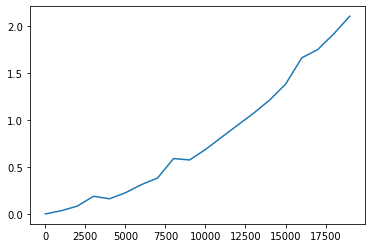

In [311]:
random.seed(0)
test_perfomance(quick_vector_sort)



In [440]:
random.seed(0)
pseudo_generator_kwargs = dict(
                l_border=0,
                r_border = 1000,
                n_vectors=50000, 
                n_points=50000        
            )
test_samples = generate_test_samples(**pseudo_generator_kwargs)

In [441]:
%%time
res = quick_vector_sort(test_samples[0], test_samples[1])

CPU times: total: 172 ms
Wall time: 150 ms


In [421]:
%%time
res = quick_vector_sort(test_samples[0], test_samples[1])

KeyboardInterrupt: 

In [408]:
%%time
res = quick_vector_sort(test_samples[0], test_samples[1])

CPU times: total: 672 ms
Wall time: 693 ms


In [386]:
%%time
res = quick_vector_sort(test_samples[0], test_samples[1])

CPU times: total: 4.31 s
Wall time: 4.35 s


In [380]:
%%time
res = quick_vector_sort(test_samples[0], test_samples[1])

CPU times: total: 13.2 s
Wall time: 13.4 s


In [362]:
%%time
res = quick_vector_sort(test_samples[0], test_samples[1])

CPU times: total: 11.6 s
Wall time: 11.7 s


In [356]:
%%time
res = quick_vector_sort(test_samples[0], test_samples[1])

CPU times: total: 11.5 s
Wall time: 11.6 s


In [241]:
vectors = [[0, 7], [2, 6], [9, 9], [8, 10], [3, 3]]
points = [1, 0, 3]

In [242]:
quick_vector_sort(vectors, points)

[1, 1, 3]

In [167]:
quick_vector_sort(vectors, points)

[1, 1, 3]

In [ ]:
points

[1, 6, 11]

In [76]:
points

[1,
 6,
 11,
 42,
 73,
 90,
 100,
 63,
 38,
 64,
 90,
 90,
 66,
 99,
 84,
 7,
 50,
 16,
 81,
 74,
 91,
 72,
 52,
 68,
 47,
 3,
 0,
 73,
 56,
 70,
 97,
 99,
 58,
 55,
 90,
 51,
 26,
 82,
 84,
 22,
 14,
 37,
 29,
 61,
 89,
 72,
 77,
 53,
 72,
 97,
 42,
 62,
 19,
 60,
 2,
 15,
 96,
 35,
 93,
 29,
 44,
 21,
 27,
 98,
 45,
 46,
 31,
 68,
 10,
 55,
 23,
 85,
 50,
 59,
 61,
 91,
 49,
 47,
 36,
 36,
 21,
 48,
 69,
 49,
 73,
 55,
 47,
 35,
 50,
 45,
 35,
 35,
 95,
 57,
 64,
 23,
 75,
 21,
 37,
 2,
 22,
 26,
 24,
 80,
 96,
 70,
 61,
 45,
 0,
 49,
 19,
 24,
 41,
 6,
 77,
 95,
 20,
 71,
 42,
 61,
 78,
 23,
 41]

In [46]:
res

[1, 0, 0]

In [16]:
def sort_vectors(vectors, pivot_el):
    return vectors

In [ ]:
res = []
for point in points:
    n_entries = sort_vectors(vectors, point)
